<h1>INSTALLATION AND IMPORTING 




DATA CLEANING 

FEATURES SELECTION<h1>


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [18]:
df1= pd.read_csv('avocado.csv')



In [19]:
df1.shape

(18249, 14)

In [20]:
df1.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [21]:
df1['DayOfWeek'] = pd.to_datetime(df1['Date']).dt.day
df1['Month'] = pd.to_datetime(df1['Date']).dt.month_name()
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,December,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,December,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,December,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,December,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,November,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,February,2018
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,January,2018
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,January,2018
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,January,2018


In [22]:
#Seasons
def get_season(month):
    if month in ['December', "January", "February"]:
        return 1
    elif month in ["March", "April", "May"]:
        return 2
    elif month in ["June", "July", "August"]:
        return 3
    else:
        return 4


df1['Seasons'] = df1['Month'].apply(get_season)
df1



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year,Seasons
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,December,2015,1
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,December,2015,1
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,December,2015,1
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,December,2015,1
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,November,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,February,2018,1
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,January,2018,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,January,2018,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,January,2018,1


In [23]:
missing_values = df1.isnull().sum()
missing_values_per_column = df1.isnull().sum(axis=0)
print(missing_values)
print(missing_values_per_column)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Year            0
Seasons         0
dtype: int64
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Year            0
Seasons         0
dtype: int64


In [24]:

columns_of_interest = [ 'AveragePrice' ,'Total Volume' , '4046'	, '4225' , '4770' , 'Total Bags' , 'Small Bags' , 'Large Bags' , 'XLarge Bags' , 'type' ] 
summary_stats = df1[columns_of_interest].describe()
summary_stats


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


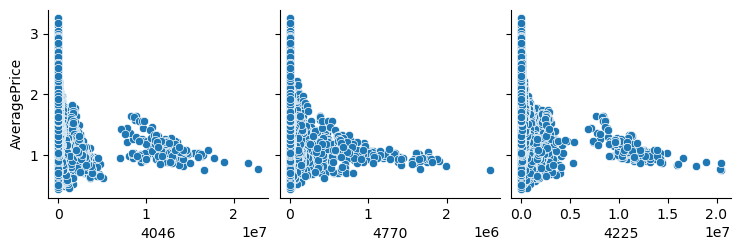

In [25]:

# Create scatter plots for each pair of variables
sns.pairplot(df1, x_vars=['4046', '4770', '4225'], y_vars=['AveragePrice'], kind='scatter')
plt.show()


MULTICOLLINEARITY

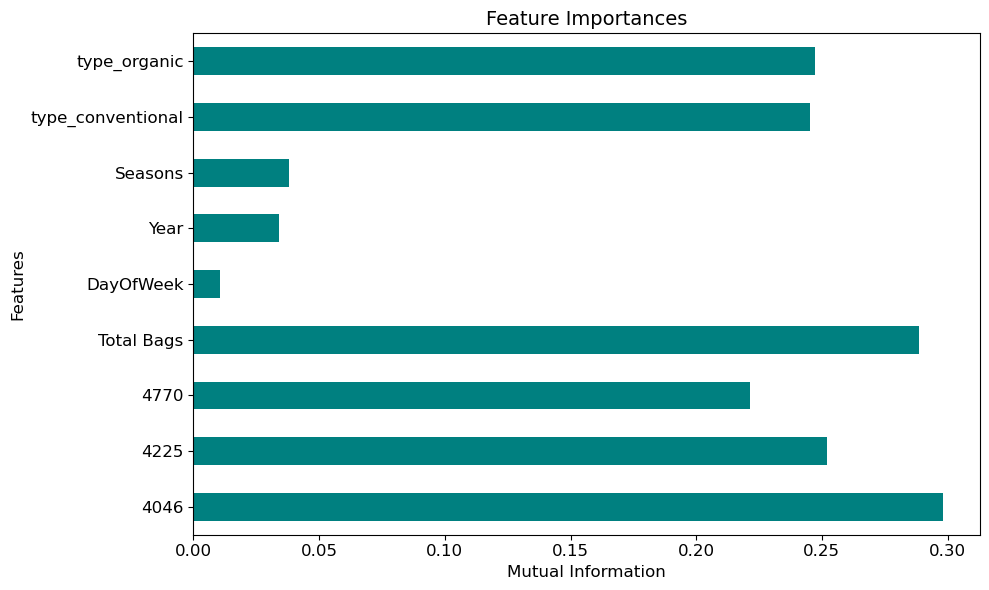

In [27]:
Y = df1['AveragePrice']
X = pd.get_dummies(df1[['4046','4225','4770','Total Bags', 'type', 'DayOfWeek', 'Year', 'Seasons']])
importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal', fontsize=12)
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()


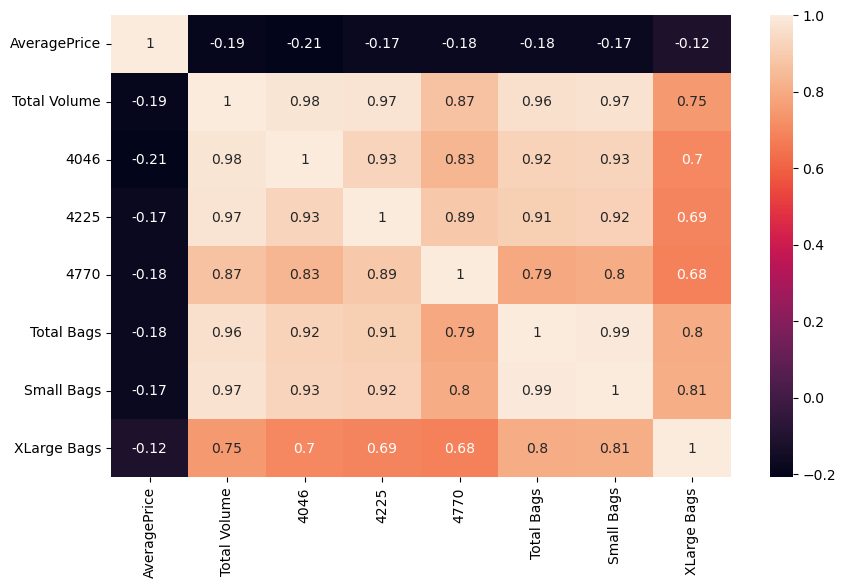

In [28]:
selected_columns = ['AveragePrice', 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'XLarge Bags']
subset_df = df1[selected_columns]
cor = subset_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True)
plt.show()

In [29]:

#VARIANCE THRESHOLD
selected_columns = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags','Year']  
X = df1[selected_columns] 
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
selected_features = v_threshold.get_support()

selected_features


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

<BarContainer object of 10 artists>

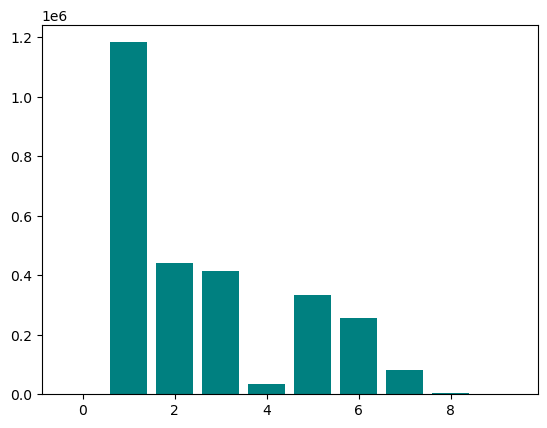

In [30]:
#Mean Absolute Difference
mean_abs_diff = np.sum(np.abs(X -np.mean(X,axis = 0)), axis =0)/X.shape[0]

plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')

In [ ]:
df1.nunique()

Unnamed: 0.1    18249
Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
DayOfWeek          31
Month              12
Year                4
Seasons             4
dtype: int64

In [31]:
df = df1.drop('year', axis=1)

In [35]:
df = df1.drop('Unnamed: 0', axis=1)

In [36]:
label_encoder = preprocessing.LabelEncoder()
df1['type']= label_encoder.fit_transform(df1['type'])
  
df1['type'].unique()

array([0, 1])

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['DayOfWeek']= label_encoder.fit_transform(df1['DayOfWeek'])
df1['region']= label_encoder.fit_transform(df1['region'])
df1['Month']= label_encoder.fit_transform(df1['Month'])

#df['DayOfWeek'].unique()


In [ ]:

Q1 = df1['AveragePrice'].quantile(0.25)
Q3 = df1['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1

# Print the interquartile range
print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 0.5599999999999998


<h1>MACHINE LEARNING MODELS<h1>
<h2>TRAINING AND TESTING MODELS<h2>

In [38]:
features = [ '4046','4770','4225', 'Total Bags','Seasons','region', 'Month', 'Year', 'type']
target = 'AveragePrice'
X = df1[features]
Y = df1[target]

scale = StandardScaler()
scaledX = scale.fit_transform(X)

print(scaledX)


[[-0.23081597 -0.21209136 -0.1999022  ... -1.03050323 -1.22128204
  -0.99983562]
 [-0.23110251 -0.21199672 -0.20805446 ... -1.03050323 -1.22128204
  -0.99983562]
 [-0.23100731 -0.21132513 -0.1544779  ... -1.03050323 -1.22128204
  -0.99983562]
 ...
 [-0.2306933  -0.20576554 -0.24309014 ... -0.43308111  1.97050371
   1.00016441]
 [-0.2304279  -0.20577419 -0.24265143 ... -0.43308111  1.97050371
   1.00016441]
 [-0.22934712 -0.21045012 -0.24317042 ... -0.43308111  1.97050371
   1.00016441]]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, Y, test_size=0.2, random_state=42)


In [40]:


dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100,random_state=0)
lasso = Lasso(alpha=1.0)
RidgeR = ridge = Ridge(alpha=1.0)
LinearR = lr = LinearRegression()
Adab = adaboost = AdaBoostRegressor()
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
StackingR = stacking_reg = StackingRegressor(estimators=[('lr', model1), ('dt', model2)]) 



listr = [dt, rf, lasso,RidgeR,LinearR,Adab,StackingR]


In [41]:
all_models = []
for i in listr:
    i.fit(X_train, y_train)
    test_y_pred = i.predict(X_test)
    train_y_pred = i.predict(X_train)
    
    train_r2 = r2_score(y_train, train_y_pred)
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    train_rmse = mean_squared_error(y_train, train_y_pred, squared=False)
    
    test_r2 = r2_score(y_test, test_y_pred)
    test_mse = mean_squared_error(y_test, test_y_pred)
    test_mae = mean_absolute_error(y_test, test_y_pred)
    test_rmse = mean_squared_error(y_test, test_y_pred, squared=False)
    
    Machine_Learning_Model = ['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test']
    Model = [train_r2, test_r2,train_mse, test_mse,train_rmse,test_rmse, train_mae, test_mae],
    all_models.append(Model)
    
dtr = all_models[0][0]
rfr = all_models[1][0]
lassor = all_models[2][0]
RidgeR = all_models[3][0]
LinearR = all_models[4][0]
Adab = all_models[5][0]
StackingR =  all_models[6][0]


In [42]:
destree = pd.DataFrame(dtr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Decision Tree'])
ranforest = pd.DataFrame(rfr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Random forest'])
lassoc = pd.DataFrame(lassor, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Lasso'])
Ridgereg = pd.DataFrame(RidgeR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Ridge'])
linearR = pd.DataFrame(LinearR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Linear Regression'])
Adaboost = pd.DataFrame(Adab, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Adaboost Regression'])
StackingRegressor = pd.DataFrame(StackingR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Stacking Regression'])


In [43]:

dfs = [destree, ranforest, lassoc, Ridgereg, linearR, Adaboost, StackingRegressor]

# Merge the DataFrames
merged_df = pd.concat(dfs, axis=1)
merged_df

,Decision Tree,Random forest,Lasso,Ridge,Linear Regression,Adaboost Regression,Stacking Regression
R2-train,1.000000e+00,0.983371,0.000000,0.465101,0.465101,0.550846,0.967826
R2-test,7.820210e-01,0.888426,-0.000195,0.454508,0.454507,0.547109,0.802106
MSE-train,9.118452e-35,0.002702,0.162501,0.086922,0.086922,0.072988,0.005228
MSE-test,3.502249e-02,0.017927,0.160700,0.087644,0.087644,0.072766,0.031796
RSME-train,9.549058e-18,0.051984,0.403114,0.294825,0.294825,0.270163,0.072307
RSME-test,1.871430e-01,0.133890,0.400874,0.296047,0.296047,0.269751,0.178313
MAE-train,4.562873e-19,0.035323,0.324643,0.226154,0.226154,0.217776,0.055431
MAE-test,1.235425e-01,0.094097,0.322499,0.228680,0.228680,0.217066,0.124836


In [44]:
#K-fold cross-validation 
model = Ridge(alpha=1.0)
features = [ '4046','4770','4225', 'Total Bags','Seasons','region', 'Month', 'Year', 'type']
target = 'AveragePrice'
X = df1[features]
Y = df1[target]
k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model, X, Y, scoring='r2', cv=cv)
for i, score in enumerate(scores):
    print(f"Fold {i+1}: R-squared = {score:.4f}")
mean_score = scores.mean()
std_score = scores.std()
print(f"\nMean R-squared: {mean_score:.4f}")
print(f"Standard Deviation: {std_score:.4f}")

Fold 1: R-squared = 0.4545
Fold 2: R-squared = 0.4625
Fold 3: R-squared = 0.4828
Fold 4: R-squared = 0.4606
Fold 5: R-squared = 0.4520

Mean R-squared: 0.4625
Standard Deviation: 0.0109


In [ ]:
joblib.dump(rf, 'rf.joblib')

['rf.joblib']

In [ ]:
loaded_model =joblib.load('rf.joblib')

In [45]:
joblib.dump(dt, 'dt.joblib')

['dt.joblib']

In [46]:
loaded_model =joblib.load('dt.joblib')